Table Of Contents:
- <a href="#stat">Problem Statement</a>
- <a href="#pre">Preprocessing:</a>
    - <a href="#pre1">Merging cab data</a>
    - <a href="#pre2">Merging Cities Data</a>
    - <a href="#pre3">Merging Transactions Data</a>
    - <a href="#pre4">Merging Customers Data</a>
- <a href="#desc">Descriptive Analysis.</a>
- <a href="#feat">Feature Engineering:</a>
    - <a href="#feat1">Adding State Column</a>
    - <a href="#feat2">Adding Cost/KM travelled column</a>
    - <a href="#feat3">Adding Price/KM Travelled Column</a>
    - <a href="#feat4">Adding Profit Column</a>
    - <a href="#feat5">Removing Transaction ID</a>
    - <a href="#feat6">Adding Customer Age Level Column</a>
    - <a href="#feat7">Adding Customer Income Class Level column</a>
    - <a href="#feat8">Adding Adding Possible users or actual population column</a>
    - <a href="#feat9">Adding Adding Popularity column.</a>
    - <a href="#feat10">Adding User Retainabilty level column</a>
- <a href="#find">Key Findings:</a>
    - <a href="#find1">Popularity of the industry in States</a>
    - <a href="#find2">Popularity of the industry in cities</a>
    - <a href="#find3">Users' Gender distribution for each company</a>
    - <a href="#find4">Travelled Distance per gender for each company</a>
    - <a href="#find5">Users' income class distribution</a>
    - <a href="#find6">Income Distribution for cities</a>
    - <a href="#find7">Income Distribution for each gender</a>
    - <a href="#find8">Users' Age level distribution</a>
    - <a href="#find9">Users' Income according to their age</a>
    - <a href="#find10">Cost and price relationship</a>
    - <a href="#find11">Distance travelled and profit realtionship</a>
    - <a href="#find12">Profit Per Place</a>
    - <a href="#find13">No. users ad profit relationship</a>
    - <a href="#find14">Retainabilty ratios for each company</a>
    - <a href="#find15">Retainabilty levels distribution for each company</a>
- <a href="#conc">Conclusion.</a>

<span id = "stat"></span>
# Ptoblem Statement:
XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

# 1. Preprocessing:

In [1]:
#Loading Libraries:
import pandas as pd
import numpy as np
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import cm
import warnings
from datetime import datetime as dt
import seaborn as sns
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#Loading Data Files
cab_data = pd.read_csv("Data/Cab_Data.csv")
customer_id = pd.read_csv("Data/Customer_ID.csv")
transaction_id = pd.read_csv("Data/Transaction_ID.csv")
city = pd.read_csv("Data/City.csv")

## 1.1 Exploring Files:

In [3]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [5]:
customer_id.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [6]:
customer_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [7]:
transaction_id.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [8]:
transaction_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [9]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [10]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [11]:
#Initiating the master df with all columns in the files
all_cols = list(set(transaction_id.columns.to_list() + city.columns.to_list() + cab_data.columns.to_list() + customer_id.columns.to_list()))
master_df = pd.DataFrame(columns = all_cols)

In [15]:
#Editing the anme of columns
new_cols = []
for col in master_df.columns:
    col = col.replace(" ", "_")
    col = col.lower()
    new_cols.append(col)

In [16]:
#Setting the column names
master_df.columns = new_cols

## 1.2 Merging the Cab Data:

In [18]:
cab_cols = []
for col in cab_data.columns:
    col = col.replace(" ", "_")
    col = col.lower()
    cab_cols.append(col)
cab_data.columns = cab_cols

master_df = pd.concat([master_df, cab_data])

In [19]:
master_df.head()

,customer_id,price_charged,company,km_travelled,transaction_id,cost_of_trip,gender,income_(usd/month),population,city,age,date_of_travel,users,payment_mode
0,NaN,370.95,Pink Cab,30.45,10000011,313.635,NaN,NaN,NaN,ATLANTA GA,NaN,42377,NaN,NaN
1,NaN,358.52,Pink Cab,28.62,10000012,334.854,NaN,NaN,NaN,ATLANTA GA,NaN,42375,NaN,NaN
2,NaN,125.2,Pink Cab,9.04,10000013,97.632,NaN,NaN,NaN,ATLANTA GA,NaN,42371,NaN,NaN
3,NaN,377.4,Pink Cab,33.17,10000014,351.602,NaN,NaN,NaN,ATLANTA GA,NaN,42376,NaN,NaN
4,NaN,114.62,Pink Cab,8.73,10000015,97.776,NaN,NaN,NaN,ATLANTA GA,NaN,42372,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,NaN,69.24,Yellow Cab,4.8,10440101,63.36,NaN,NaN,NaN,WASHINGTON DC,NaN,43108,NaN,NaN
359388,NaN,113.75,Yellow Cab,8.4,10440104,106.848,NaN,NaN,NaN,WASHINGTON DC,NaN,43104,NaN,NaN
359389,NaN,437.07,Yellow Cab,27.75,10440105,349.65,NaN,NaN,NaN,WASHINGTON DC,NaN,43105,NaN,NaN
359390,NaN,146.19,Yellow Cab,8.8,10440106,114.048,NaN,NaN,NaN,WASHINGTON DC,NaN,43105,NaN,NaN


## 1.3 Merging the City Data:

In [20]:
cities = city["City"].value_counts().index
for c in cities:
    city_len = len(master_df[master_df["city"] == c]["population"])
    city_pop = int(city[city["City"] == c]["Population"].values[0].strip().replace(",", ""))
    city_users = int(city[city["City"] == c]["Users"].values[0].strip().replace(",", ""))
    master_df.loc[master_df["city"] == c, "population"] = [city_pop]*city_len
    master_df.loc[master_df["city"] == c, "users"] = [city_users]*city_len

In [ ]:
master_df.head()

## 1.4 Merging Transaction Data:

In [22]:
def trans_user(t):
    global transaction_id
    user = int(transaction_id[transaction_id["Transaction ID"] == t]["Customer ID"].values[0])
    return user
def trans_pay(t):
    global transaction_id
    payment = transaction_id[transaction_id["Transaction ID"] == t]["Payment_Mode"].values[0]
    return payment

In [23]:
master_df["customer_id"] = master_df["transaction_id"].apply(trans_user)
master_df["payment_mode"] = master_df["transaction_id"].apply(trans_pay)

In [24]:
master_df.head()

,customer_id,price_charged,company,km_travelled,transaction_id,cost_of_trip,gender,income_(usd/month),population,city,age,date_of_travel,users,payment_mode
0,29290,370.95,Pink Cab,30.45,10000011,313.635,NaN,NaN,814885,ATLANTA GA,NaN,42377,24701,Card
1,27703,358.52,Pink Cab,28.62,10000012,334.854,NaN,NaN,814885,ATLANTA GA,NaN,42375,24701,Card
2,28712,125.2,Pink Cab,9.04,10000013,97.632,NaN,NaN,814885,ATLANTA GA,NaN,42371,24701,Cash
3,28020,377.4,Pink Cab,33.17,10000014,351.602,NaN,NaN,814885,ATLANTA GA,NaN,42376,24701,Cash
4,27182,114.62,Pink Cab,8.73,10000015,97.776,NaN,NaN,814885,ATLANTA GA,NaN,42372,24701,Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,52392,69.24,Yellow Cab,4.8,10440101,63.36,NaN,NaN,418859,WASHINGTON DC,NaN,43108,127001,Cash
359388,53286,113.75,Yellow Cab,8.4,10440104,106.848,NaN,NaN,418859,WASHINGTON DC,NaN,43104,127001,Cash
359389,52265,437.07,Yellow Cab,27.75,10440105,349.65,NaN,NaN,418859,WASHINGTON DC,NaN,43105,127001,Cash
359390,52175,146.19,Yellow Cab,8.8,10440106,114.048,NaN,NaN,418859,WASHINGTON DC,NaN,43105,127001,Card


## 1.5 Merging the Customer Data:

In [25]:
def user_gender(u):
    global customer_id
    gender = customer_id[customer_id["Customer ID"] == u]["Gender"].values[0]
    return gender
def user_age(u):
    global customer_id
    age = customer_id[customer_id["Customer ID"] == u]["Age"].values[0]
    return age
def user_income(u):
    global customer_id
    income = customer_id[customer_id["Customer ID"] == u]["Income (USD/Month)"].values[0]
    return income

In [26]:
master_df["gender"] = master_df["customer_id"].apply(user_gender)
master_df["age"] = master_df["customer_id"].apply(user_age)
master_df["income_(usd/month)"] = master_df["customer_id"].apply(user_income)

In [27]:
master_df.head()

,customer_id,price_charged,company,km_travelled,transaction_id,cost_of_trip,gender,income_(usd/month),population,city,age,date_of_travel,users,payment_mode
0,29290,370.95,Pink Cab,30.45,10000011,313.635,Male,10813,814885,ATLANTA GA,28,42377,24701,Card
1,27703,358.52,Pink Cab,28.62,10000012,334.854,Male,9237,814885,ATLANTA GA,27,42375,24701,Card
2,28712,125.2,Pink Cab,9.04,10000013,97.632,Male,11242,814885,ATLANTA GA,53,42371,24701,Cash
3,28020,377.4,Pink Cab,33.17,10000014,351.602,Male,23327,814885,ATLANTA GA,23,42376,24701,Cash
4,27182,114.62,Pink Cab,8.73,10000015,97.776,Male,8536,814885,ATLANTA GA,33,42372,24701,Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,52392,69.24,Yellow Cab,4.8,10440101,63.36,Male,15651,418859,WASHINGTON DC,24,43108,127001,Cash
359388,53286,113.75,Yellow Cab,8.4,10440104,106.848,Male,6528,418859,WASHINGTON DC,32,43104,127001,Cash
359389,52265,437.07,Yellow Cab,27.75,10440105,349.65,Male,7966,418859,WASHINGTON DC,56,43105,127001,Cash
359390,52175,146.19,Yellow Cab,8.8,10440106,114.048,Male,6423,418859,WASHINGTON DC,32,43105,127001,Card


## 1.6 Checking for null values:

In [28]:
master_df.isna().sum()

customer_id           0
price_charged         0
company               0
km_travelled          0
transaction_id        0
cost_of_trip          0
gender                0
income_(usd/month)    0
population            0
city                  0
age                   0
date_of_travel        0
users                 0
payment_mode          0
dtype: int64

## Saving the master data:

In [31]:
master_df.to_csv("Data/master_data.csv", index=False)

In [2]:
df_full = pd.read_csv("Data/master_data.csv")

In [3]:
df_full.head()

,customer_id,price_charged,company,km_travelled,transaction_id,cost_of_trip,gender,income_(usd/month),population,city,age,date_of_travel,users,payment_mode
0,29290,370.95,Pink Cab,30.45,10000011,313.635,Male,10813,814885,ATLANTA GA,28,42377,24701,Card
1,27703,358.52,Pink Cab,28.62,10000012,334.854,Male,9237,814885,ATLANTA GA,27,42375,24701,Card
2,28712,125.20,Pink Cab,9.04,10000013,97.632,Male,11242,814885,ATLANTA GA,53,42371,24701,Cash
3,28020,377.40,Pink Cab,33.17,10000014,351.602,Male,23327,814885,ATLANTA GA,23,42376,24701,Cash
4,27182,114.62,Pink Cab,8.73,10000015,97.776,Male,8536,814885,ATLANTA GA,33,42372,24701,Card


## 1.7 Dividing Data:

In [5]:
df_full.company.value_counts()

Yellow Cab    274681
Pink Cab       84711
Name: company, dtype: int64

In [8]:
pink_data = df_full[df_full["company"] == "Pink Cab"]

In [10]:
yellow_data = df_full[df_full["company"] == "Yellow Cab"]

## 1.9 Adding Dates:

In [14]:
pink_data = pink_data.sort_values("date_of_travel").reset_index()

In [15]:
pink_data = pink_data.drop(columns = "index")

In [16]:
pink_data.head()

,customer_id,price_charged,company,km_travelled,transaction_id,cost_of_trip,gender,income_(usd/month),population,city,age,date_of_travel,users,payment_mode
0,22469,114.15,Pink Cab,8.55,10000164,89.775,Male,4378,943999,PHOENIX AZ,37,42371,6133,Card
1,3330,500.22,Pink Cab,35.34,10000060,395.808,Male,5216,1955130,CHICAGO IL,46,42371,164468,Card
2,30718,61.30,Pink Cab,7.02,10000070,82.836,Male,20255,754233,DENVER CO,52,42371,12421,Cash
3,7539,850.87,Pink Cab,38.00,10000127,425.600,Male,24169,1595037,LOS ANGELES CA,40,42371,144132,Card
4,39975,94.49,Pink Cab,5.40,10000370,58.320,Male,7931,631442,TUCSON AZ,40,42371,5712,Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84706,8034,466.14,Pink Cab,38.00,10436963,402.800,Male,12544,1595037,LOS ANGELES CA,36,43465,144132,Cash
84707,900,741.22,Pink Cab,42.00,10433575,504.000,Female,11580,8405837,NEW YORK NY,29,43465,302149,Card
84708,30591,326.91,Pink Cab,19.98,10433249,217.782,Male,4968,754233,DENVER CO,30,43465,12421,Card
84709,7115,511.41,Pink Cab,38.94,10433255,412.764,Female,32791,1595037,LOS ANGELES CA,64,43465,144132,Card


In [17]:
def convert_to_date(date):
    """
    Thins Function Get the date of each transaction
    """
    true_date = pd.to_datetime(date, yearfirst=True) + pd.Timedelta(weeks = 46*52, days = 87)
    strdate = dt.strftime(true_date, format ="%Y/%m/%d")
    datef = dt.strptime(strdate, "%Y/%m/%d")
    return(datef)

In [18]:
pink_data["date_of_travel"] = pink_data["date_of_travel"].apply(convert_to_date)

In [19]:
yellow_data = yellow_data.sort_values("date_of_travel").reset_index()
yellow_data = yellow_data.drop(columns = "index")
yellow_data["date_of_travel"] = yellow_data["date_of_travel"].apply(convert_to_date)

In [22]:
pink_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84711 entries, 0 to 84710
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_id         84711 non-null  int64         
 1   price_charged       84711 non-null  float64       
 2   company             84711 non-null  object        
 3   km_travelled        84711 non-null  float64       
 4   transaction_id      84711 non-null  int64         
 5   cost_of_trip        84711 non-null  float64       
 6   gender              84711 non-null  object        
 7   income_(usd/month)  84711 non-null  int64         
 8   population          84711 non-null  int64         
 9   city                84711 non-null  object        
 10  age                 84711 non-null  int64         
 11  date_of_travel      84711 non-null  datetime64[ns]
 12  users               84711 non-null  int64         
 13  payment_mode        84711 non-null  object    

## 1.8 Rechecking the column types:

In [23]:
pink_data["price_charged"] = pink_data["price_charged"].astype(float)
pink_data["km_travelled"] = pink_data["km_travelled"].astype(float)
pink_data["cost_of_trip"] = pink_data["cost_of_trip"].astype(float)
pink_data["population"] = pink_data["population"].astype(float)
pink_data["users"] = pink_data["users"].astype(float)

In [24]:
yellow_data["price_charged"] = yellow_data["price_charged"].astype(float)
yellow_data["km_travelled"] = yellow_data["km_travelled"].astype(float)
yellow_data["cost_of_trip"] = yellow_data["cost_of_trip"].astype(float)
yellow_data["population"] = yellow_data["population"].astype(float)
yellow_data["users"] = yellow_data["users"].astype(float)

# 2. Descriptive data analysis:

## 2.1 Numerical Columns:

In [ ]:
#Numerical coulmns Pink:
for i in pink_data.drop(columns = ["customer_id", "transaction_id"]).columns.to_list():
    if(str(pink_data[i].dtype) == 'int64') | (str(pink_data[i].dtype) == 'float64'):
        # Print Statistics of it
        print("Descriptive Statistics is for columns {} :\n {}".format(i, pink_data[i].describe()))
        fig, ax = plt.subplots(1,2, figsize = (15,5))
        ax[0].set_title(f"Box Plot For Columns {i}")
        ax[0].boxplot(pink_data[i], vert = False, sym = "r.")
        ax[1].set_title(f"Histogram of values for column {i}")
        r = ax[1].hist(pink_data[i], histtype = "bar")
        ax[1].set_ylim(top = np.max(r[0]) + 0.2*np.max(r[0]) )
        plt.show()

In [ ]:
#Numerical coulmns Yellow:
for i in yellow_data.drop(columns = ["customer_id", "transaction_id"]).columns.to_list():
    if(str(yellow_data[i].dtype) == 'int64') | (str(yellow_data[i].dtype) == 'float64'):
        # Print Statistics of it
        print("Descriptive Statistics is for columns {} :\n {}".format(i, yellow_data[i].describe()))
        fig, ax = plt.subplots(2,1, figsize = (10,10))
        ax[0].set_title(f"Box Plot For Columns {i}")
        ax[0].boxplot(yellow_data[i], vert = False, sym = "r.")
        ax[1].set_title(f"Histogram of values for column {i}")
        r = ax[1].hist(yellow_data[i], histtype = "bar")
        ax[1].set_ylim(top = np.max(r[0]) + 0.2*np.max(r[0]) )
        plt.show()

## 2.2 Categorical Data:

In [27]:
#Categorical values pink
for i in pink_data.drop(columns = ["company"]).columns.to_list():
    if str(pink_data[i].dtype) == 'object':
        print(f" ============ Categorical Columns {i} ===========")
        print(f" ============ Unique Values ===========")
        print(pink_data[i].unique())
        print(f" ============ Value Counts ===========")
        print(pink_data[i].value_counts())

 ============ Categorical Columns company ===========
 ============ Unique Values ===========
['Pink Cab']
 ============ Value Counts ===========
Pink Cab    84711
Name: company, dtype: int64
 ============ Categorical Columns gender ===========
 ============ Unique Values ===========
['Male' 'Female']
 ============ Value Counts ===========
Male      47231
Female    37480
Name: gender, dtype: int64
 ============ Categorical Columns city ===========
 ============ Unique Values ===========
['PHOENIX AZ' 'CHICAGO IL' 'DENVER CO' 'LOS ANGELES CA' 'TUCSON AZ'
 'SEATTLE WA' 'SAN DIEGO CA' 'DALLAS TX' 'WASHINGTON DC' 'ATLANTA GA'
 'NEW YORK NY' 'SILICON VALLEY' 'MIAMI FL' 'BOSTON MA' 'ORANGE COUNTY'
 'SACRAMENTO CA' 'AUSTIN TX' 'PITTSBURGH PA' 'NASHVILLE TN']
 ============ Value Counts ===========
LOS ANGELES CA    19865
NEW YORK NY       13967
SAN DIEGO CA      10672
CHICAGO IL         9361
BOSTON MA          5186
SILICON VALLEY     3797
WASHINGTON DC      3692
SEATTLE WA         2732
MIAMI F

In [28]:
#Categorical values yellow
for i in yellow_data.drop(columns = ["company"]).columns.to_list():
    if str(yellow_data[i].dtype) == 'object':
        print(f" ============ Categorical Columns {i} ===========")
        print(f" ============ Unique Values ===========")
        print(yellow_data[i].unique())
        print(f" ============ Value Counts ===========")
        print(yellow_data[i].value_counts())

 ============ Categorical Columns company ===========
 ============ Unique Values ===========
['Yellow Cab']
 ============ Value Counts ===========
Yellow Cab    274681
Name: company, dtype: int64
 ============ Categorical Columns gender ===========
 ============ Unique Values ===========
['Male' 'Female']
 ============ Value Counts ===========
Male      158681
Female    116000
Name: gender, dtype: int64
 ============ Categorical Columns city ===========
 ============ Unique Values ===========
['ATLANTA GA' 'LOS ANGELES CA' 'CHICAGO IL' 'SAN DIEGO CA' 'WASHINGTON DC'
 'NEW YORK NY' 'SACRAMENTO CA' 'PHOENIX AZ' 'SEATTLE WA' 'NASHVILLE TN'
 'DALLAS TX' 'DENVER CO' 'SILICON VALLEY' 'TUCSON AZ' 'BOSTON MA'
 'AUSTIN TX' 'ORANGE COUNTY' 'MIAMI FL' 'PITTSBURGH PA']
 ============ Value Counts ===========
NEW YORK NY       85918
CHICAGO IL        47264
WASHINGTON DC     40045
LOS ANGELES CA    28168
BOSTON MA         24506
SAN DIEGO CA       9816
ATLANTA GA         5795
DALLAS TX          5637


Here:
- Gender:
- For City:
- For Payment Mode:

<span id = "feat"></span>
# 3. Feature Engineering:

<span id = "feat1"></span>
## 3.1 Adding State Column:

Adding a State column to the data and this is included in the city column.

In [ ]:
# Adding State Column: #Silicon Valey is located in california
pink_data["city"] = pink_data["city"].replace({"SILICON VALLEY" : "SILICON VALLEY CA"
                                               , "ORANGE COUNTY": "ORANGE COUNTY CA"})
yellow_data["city"] = yellow_data["city"].replace({"SILICON VALLEY" : "SILICON VALLEY CA",
                                               "ORANGE COUNTY": "ORANGE COUNTY CA"})

In [30]:
def get_state(city):
    state = city[-2:]
    return state

In [31]:
pink_data["state"] = pink_data["city"].apply(get_state)
yellow_data["state"] = yellow_data["city"].apply(get_state)

In [32]:
def del_state_form_city(city):
    x = city[:-3]
    return x

In [33]:
pink_data["city"] = pink_data["city"].apply(del_state_form_city)
yellow_data["city"] = yellow_data["city"].apply(del_state_form_city)

<span id = "feat2"></span>
## 3.2 Adding Cost Per KM:

Adding Cost per KM travelled for Each trip.

In [34]:
## Cost Per Kilometer
pink_data["cost/km"] =  pink_data["cost_of_trip"] / pink_data["km_travelled"]
yellow_data["cost/km"] =  yellow_data["cost_of_trip"] / yellow_data["km_travelled"]

<span id = "feat3"></span>
## 3.3 Adding Price Per KM:

Price per Km travelled per each trip.

In [35]:
## price Per Kilometer
pink_data["price/km"] =  pink_data["price_charged"] / pink_data["km_travelled"]
yellow_data["price/km"] =  yellow_data["price_charged"] / yellow_data["km_travelled"]

<span id = "feat4"></span>
## 3.4 Adding Profit Column:

Profit Margin for each trip is: Price - Cost

In [36]:
## Profit of the data
pink_data["profit"] =  pink_data["price_charged"]  - pink_data["cost_of_trip"]
yellow_data["profit"] =  yellow_data["price_charged"]  - yellow_data["cost_of_trip"]

<span id = "feat5"></span>
## 3.5 Deleting Transaction ID:

This is a high carignality column that has no effect on the data so we can ignore it.

In [38]:
## Delting transaction ID
pink_data = pink_data.drop(columns = "transaction_id")
yellow_data = yellow_data.drop(columns = "transaction_id")

<span id = "feat6"></span>
## 3.6 Adding Age Levels:

Added age level feature with four levels:
- Teenager: Less than 18 Years
- Adult: Between 18 and 30 Years. 
- Mid Age Adult: Between 30 and 50 Years.
- Senior Adult: more than 50 Years.

In [39]:
## Adding age level:
def age_level(age):
    if age>50:
        return "Senior Adult"
    elif((age <= 50 )&(age > 30)):
        return "Mid Age Adult"
    elif((age <= 30 )&(age > 18)):
        return "Adult"
    else:
        return "Teenager"

In [40]:
pink_data["age_level"] = pink_data["age"].apply(age_level)
yellow_data["age_level"] = yellow_data["age"].apply(age_level)

<span id = "feat7"></span>
## 3.7 Adding Customer Income Class:

We have divided the classes of the income into 3 categories:
- Class A: Yearly income more than 156.6k 
- Class B: Yearly income between (52k - 156.6k)
- Class C: Less than 52k

In [41]:
## Getting Customer Class:
def get_income_class(income):
    yearly_income = 12 * income
    if(yearly_income < 52000):
        return "C"
    elif(yearly_income >= 52000)&(yearly_income < 156600):
        return "B"
    else:
        return "A"

In [42]:
pink_data["customer_level"]= pink_data["income_(usd/month)"].apply(get_income_class)
yellow_data["customer_level"]= yellow_data["income_(usd/month)"].apply(get_income_class)

<span id = "feat8"></span>
## 3.8 Calculating Actual Population:

331,501,080 Was USA Population, 60.29 Million was the people under 15 years, Here we assume that the people that are elegible to use the companys is +15 Years old, So we will exclude thier population portion from the population of each city to calculate the correct popularity.

In [47]:
def get_acutal_population(population):
    under_15 = 60290000
    under_15_portion = under_15/331501080 
    actual_population = int(population - (under_15_portion*population))
    return actual_population

In [51]:
pink_data["actual_population"] = pink_data["population"].apply(get_acutal_population)

In [53]:
yellow_data["actual_population"] = yellow_data["population"].apply(get_acutal_population)

<span id = "feat9"></span>
## 3.9 Calculating Popularity for each city:

Popularity of each company was portion of the users for each state.

In [214]:
## Adding Popularity of the company
pink_data["popularity"] =  (pink_data["users"] / pink_data["actual_population"])*100
yellow_data["popularity"] = (yellow_data["users"] / yellow_data["actual_population"])*100

In [52]:
pink_data["profit/km"] = pink_data["profit"] / pink_data["km_travelled"]
yellow_data["profit/km"] = yellow_data["profit"] / yellow_data["km_travelled"]

<span id = "feat10"></span>
## 3.10 Adding User Retainanbility Level:

Classifying the users into 3 categories accoring the the level or repeated use for each company, and these categories are:
- Very Loyal User: used the company more than 75% of other users.
- Loyal: Used the compnay more than 25% and less than 75% of other users.
- Visitor: Used Company for 1 time only.

In [131]:
#Adding inportant users: according to repetition of service
def user_repeted(df):
    desc = df["customer_id"].value_counts().describe()
    l1_users = df["customer_id"].value_counts()[df["customer_id"].value_counts() > desc["75%"]].index
    l2_users = df["customer_id"].value_counts()[(df["customer_id"].value_counts() <= desc["75%"]) & (df["customer_id"].value_counts() > desc["25%"])].index
    def add_importaince(customer, l1 = l1_users, l2 = l2_users):
        if(customer in l1):
            return "Very Loyal User"
        elif(customer in l2):
            return "Loyal"
        else:
            return "Visitor"
    df["customer_loyability"] = df["customer_id"].apply(add_importaince)
    return df

In [132]:
pink_data =  user_repeted(pink_data)
yellow_data =  user_repeted(yellow_data)

3.0 1.0
10.0 1.0


In [78]:
pink_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84711 entries, 0 to 84710
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_id         84711 non-null  int64         
 1   price_charged       84711 non-null  float64       
 2   company             84711 non-null  object        
 3   km_travelled        84711 non-null  float64       
 4   cost_of_trip        84711 non-null  float64       
 5   gender              84711 non-null  object        
 6   income_(usd/month)  84711 non-null  int64         
 7   population          84711 non-null  float64       
 8   city                84711 non-null  object        
 9   age                 84711 non-null  int64         
 10  date_of_travel      84711 non-null  datetime64[ns]
 11  users               84711 non-null  float64       
 12  payment_mode        84711 non-null  object        
 13  state               84711 non-null  object    

In [79]:
yellow_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274681 entries, 0 to 274680
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   customer_id         274681 non-null  int64         
 1   price_charged       274681 non-null  float64       
 2   company             274681 non-null  object        
 3   km_travelled        274681 non-null  float64       
 4   cost_of_trip        274681 non-null  float64       
 5   gender              274681 non-null  object        
 6   income_(usd/month)  274681 non-null  int64         
 7   population          274681 non-null  float64       
 8   city                274681 non-null  object        
 9   age                 274681 non-null  int64         
 10  date_of_travel      274681 non-null  datetime64[ns]
 11  users               274681 non-null  float64       
 12  payment_mode        274681 non-null  object        
 13  state               274681 no

## 3.12 Saving the files:

In [53]:
pink_data.to_csv("Data/pink_data_final.csv", index = False)

In [54]:
yellow_data.to_csv("Data/yellow_data_final.csv", index = False)

In [2]:
pink_data = pd.read_csv("Data/pink_data_final.csv")
yellow_data = pd.read_csv("Data/yellow_data_final.csv")

<span id = "find"></span>
# 4. Key Findings:

<span id = "find1"></span>
## 4.1 What is the popularity of the Industry at each city?

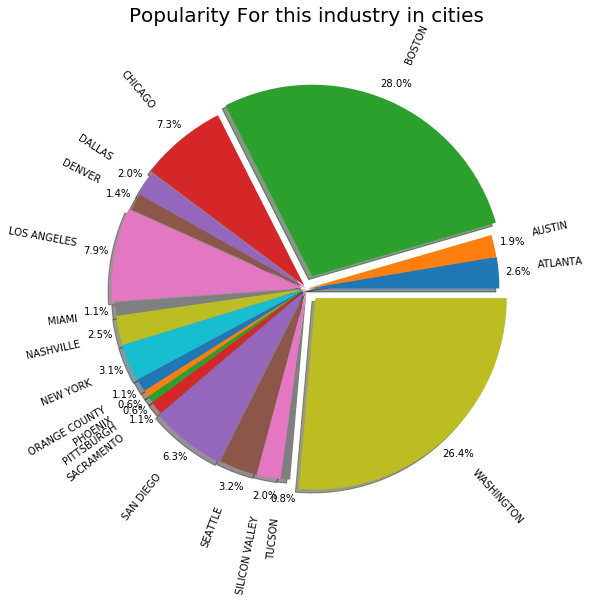

In [216]:
#Popularity distribution for pink company:
plt.figure(figsize =(8,8))
plt.title("Popularity For this industry in cities", y = 1.1, fontsize = 20)
plt.pie(yellow_data.groupby("city")["popularity"].mean(), 
        labels =yellow_data.groupby("city")["popularity"].mean().index, 
        autopct = '%1.1f%%', explode = 0.002*yellow_data.groupby("city")["popularity"].mean().values, 
        shadow = True, pctdistance=1.1, labeldistance=1.2, rotatelabels= True, radius=1.1)
plt.show()

<span id = "find2"></span>
## 4.2 What is the popularity of the industry for each state?

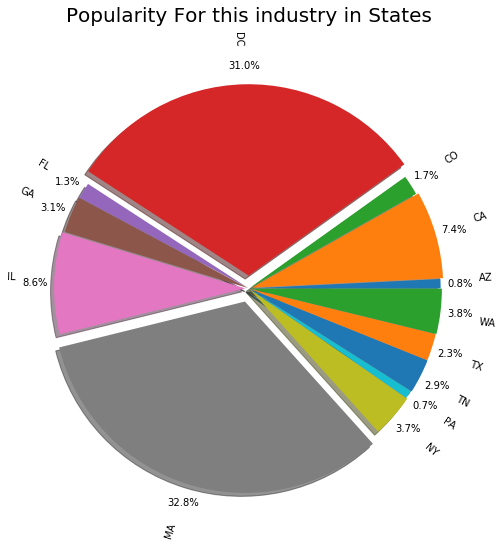

In [4]:
#Popularity distribution for pink company:
plt.figure(figsize =(8,8))
plt.title("Popularity For this industry in States", y = 1.1, fontsize = 20)
plt.pie(pink_data.groupby("state")["popularity"].mean(), 
        labels =pink_data.groupby("state")["popularity"].mean().index, 
        autopct = '%1.1f%%', explode = 0.002*pink_data.groupby("state")["popularity"].mean().values, 
        shadow = True, pctdistance=1.1, labeldistance=1.2, rotatelabels= True, radius=1.1)
plt.show()

Here we can see that, most of the users comes from two major cities that represents +50% of the users, and also there are some cities that may have a great prospect in the future right Los Angles and San Diego.

For the States we can see D.C. state, and Miami that have a +60% Contribution of the number of users with some proising states like Illionis and California.

<span id = "find3"></span>

## 4.3 What is the gender distribution of each comapny?

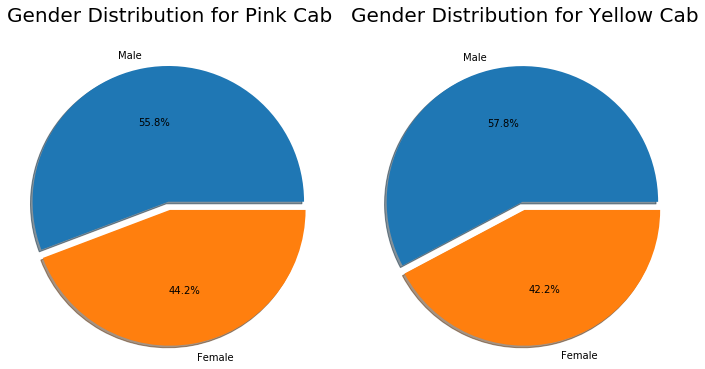

In [213]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,5))


ax2.set_title("Gender Distribution for Yellow Cab", y = 1.2, fontsize = 20)
ax2.pie(yellow_data["gender"].value_counts(), radius=1.3, shadow= True, autopct="%1.1f%%",
       labels = yellow_data["gender"].value_counts().index, labeldistance=1.1, explode = [0.08,0])
ax1.set_title("Gender Distribution for Pink Cab", y = 1.2, fontsize = 20)
ax1.pie(pink_data["gender"].value_counts(), radius=1.3, shadow= True, autopct="%1.1f%%",
       labels = pink_data["gender"].value_counts().index, labeldistance=1.1, explode = [0.08,0])

plt.tight_layout()
plt.show()

This shows that, genders that uses each company is almost the same, and the Male distribution  ( 55.5 - 57.8 %) is slightly more thean the Female distibution(42.2 - 44.2 %).

<span id = "find4"></span>

## 4.4 Does Any gender travel more distances?

Here we will test if the the gender affets the distance travelled, maybe the Females tend to travel less than the Males due to security or that Females maybe tend to be just a housewife and don't have a lot of acitivites.

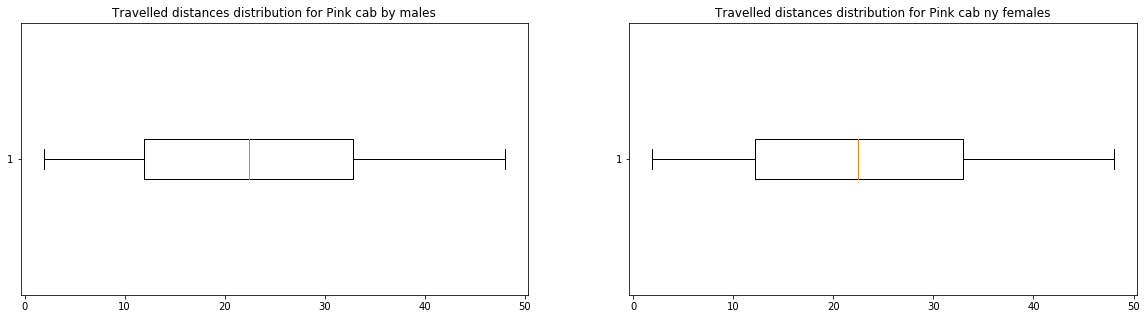

In [196]:
x2 = pink_data[pink_data["gender"] == "Male"]["km_travelled"]
x3 = pink_data[pink_data["gender"] == "Female"]["km_travelled"]
fig, axs = plt.subplots(1,2, figsize = (20,5))
axs[0].boxplot(x2, sym = ".r", vert = False)
axs[0].set_title("Travelled distances distribution for Pink cab by males")
axs[1].boxplot(x3, sym = ".r", vert = False)
axs[1].set_title("Travelled distances distribution for Pink cab ny females")
plt.show()

This Shows that there is no difference in genral in the distance travelled per each gender, and they have almost the same distance.

This Can be translated into that, whether the Female is a house of a working wife, it contributes equally when it comes to the distance travelled. 

<span id = "find5"></span>

## 4.5 What are the users classes in each company?

it's known that, the higher income that the user has, the more welfare he/she has, so according to income, does the income class of a user affects the distance travelled by the user?

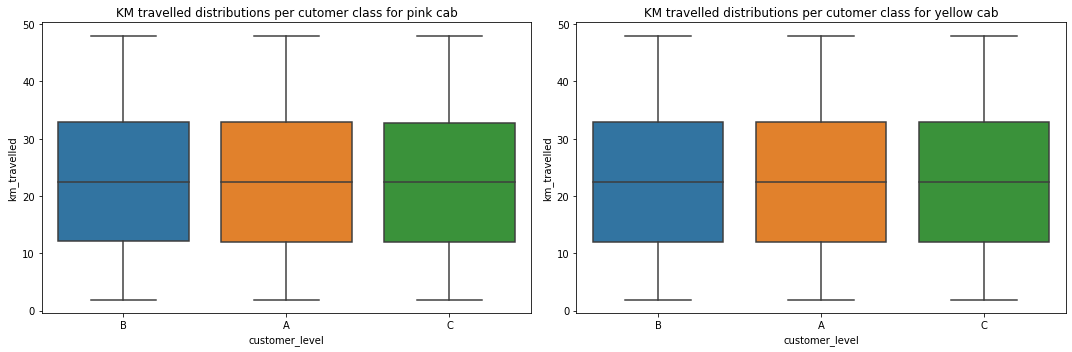

In [168]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (15,5))

ax1.set_title("KM travelled distributions per cutomer class for pink cab")
sns.boxplot(x = pink_data["customer_level"], y = pink_data["km_travelled"], ax = ax1)

ax2.set_title("KM travelled distributions per cutomer class for yellow cab")
sns.boxplot(x = yellow_data["customer_level"], y = yellow_data["km_travelled"], ax = ax2)

plt.tight_layout()
plt.show()

It Appears that for both companys income class doesn't affect the usage of the user for the service, which may mean that,  whatever the price all users and peopple from different income classes can uses these services.

<span id = "find6"></span>

## 4.6 What is the income distibution of the users in all cities?

Does the Place of the user affects the income that he has?

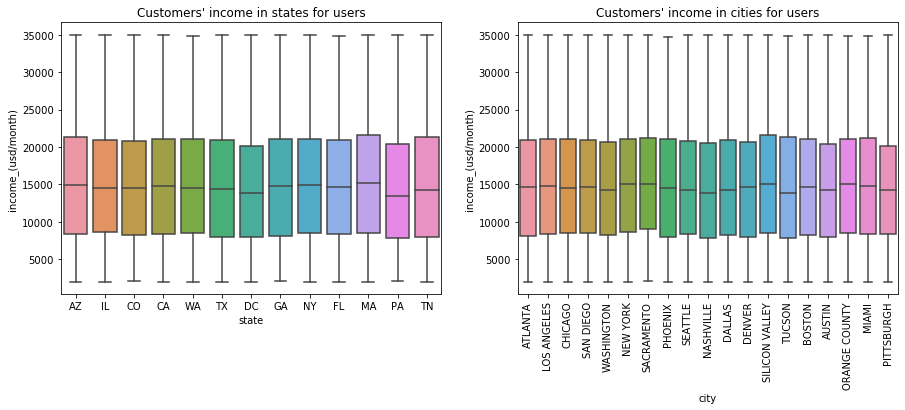

In [156]:

fig, (ax1, ax2) = plt.subplots(1,2,figsize = (15,5))

ax1.set_title("Customers' income in states for users")
sns.boxplot(x = pink_data["state"], y = pink_data["income_(usd/month)"], ax =ax1)


ax2.set_title("Customers' income in cities for users")
sns.boxplot(x = yellow_data["city"], y = yellow_data["income_(usd/month)"], ax= ax2)
plt.xticks(rotation = 90)
plt.show()

It appears that at all states and cities, they are centered tat the national level of 15k per month, and the place dosn't matter.

<span id = "find7"></span>

## 4.7 What is the income distribution of each gender?

Does Gender affects the income of the user?

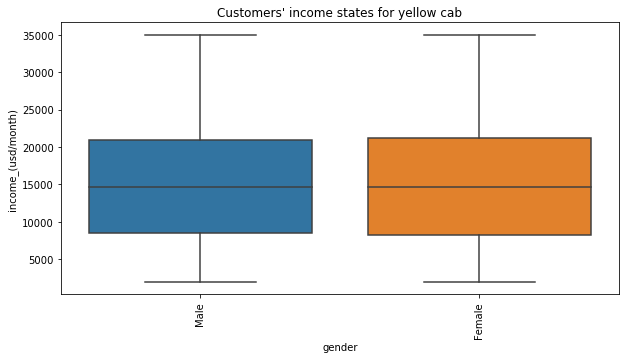

In [75]:
plt.figure(figsize=(10,5))
plt.title("Customers' income states for yellow cab")
sns.boxplot(x = pink_data["gender"], y = pink_data["income_(usd/month)"])
plt.xticks(rotation = 90)
plt.show()

This appears that USA is an equal opportunity for both Males and Females that has the same Income Ranges.

<span id = "find8"></span>

## 4.8 What is the Age leve distribution of the users of each company?:

More Recent(Yonger) people is expected to trust and use the technology more, does this appears in our data?

In [76]:
# - Number of users VS Profit from state (Scatter)
s = pink_data.groupby("state")
users = []
for g in s.groups:
    users.append(len(s.get_group(g)["customer_id"].value_counts()))

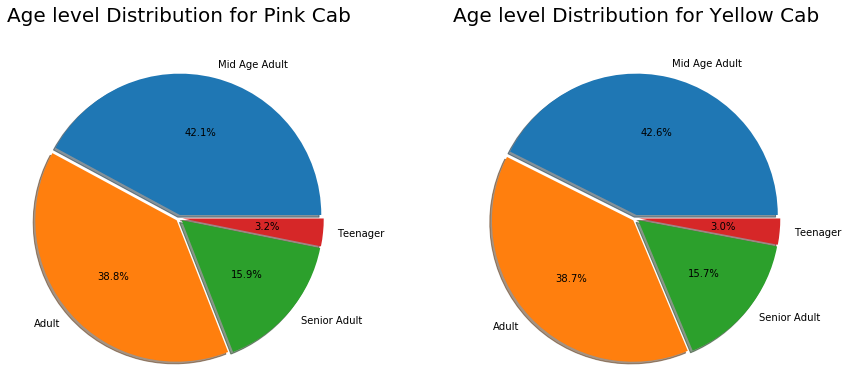

In [3]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize  = (15,5))

ax1.set_title("Age level Distribution for Pink Cab", y = 1.2, fontsize = 20)
ax1.pie(pink_data["age_level"].value_counts(), radius=1.3, shadow= True, autopct="%1.1f%%", 
        labels = pink_data["age_level"].value_counts().index, labeldistance=1.1, 
        explode = [0.03]*len(pink_data["age_level"].value_counts().index))

ax2.set_title("Age level Distribution for Yellow Cab", y = 1.2, fontsize = 20)
ax2.pie(yellow_data["age_level"].value_counts(), radius=1.3, shadow= True, autopct="%1.1f%%", 
        labels = yellow_data["age_level"].value_counts().index, labeldistance=1.1, 
        explode = [0.03]*len(yellow_data["age_level"].value_counts().index))
plt.show()

Here We can see that, Yonger People (Adults and mid age adults) contibutes the most for this industry, so it's important for this industry to have a proper ways to reach this slice of users.

<span id = "find9"></span>

## 4.9 What is the income distribution of the users in cities and states according to their age?

After Knowing the gender and age distribution for the users, does the age affect the income they recive?

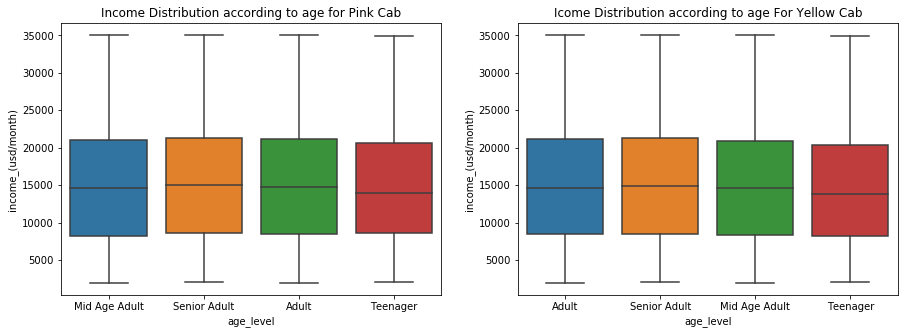

In [163]:
# Income per Age
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (15,5))

ax1.set_title("Income Distribution according to age for Pink Cab")
sns.boxplot(x = pink_data["age_level"], y = pink_data["income_(usd/month)"], ax = ax1)

ax2.set_title("Icome Distribution according to age For Yellow Cab")
sns.boxplot(x = yellow_data["age_level"], y = yellow_data["income_(usd/month)"], ax = ax2)


plt.show()

Althogh the Teeager People has less Median income than other levels, but not that far, so we can assume that the users income is independent on their ages.

<span id = "find10"></span>

## 4.10 Does the increase in cost is the reason of increase of the price of trips?

Here we need to study the major aspects that may affect the performance an dprofits for the two companies so we can hav a better look at their revenues and more sense about how different aspects can affect their businesses.

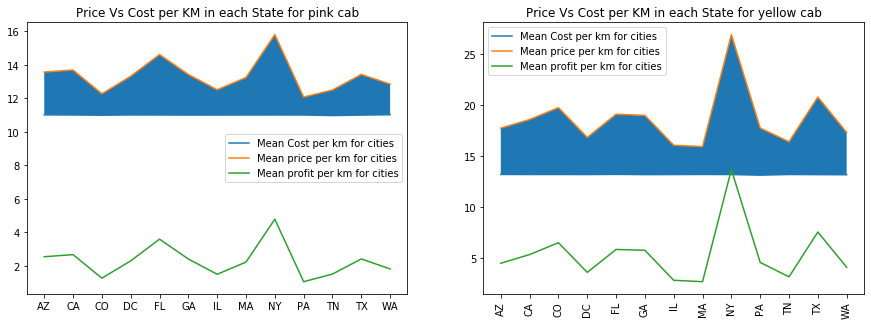

In [208]:
x1 = pink_data.groupby("state")["cost/km", "price/km", "profit/km"].mean()
x2 = yellow_data.groupby("state")["cost/km", "price/km", "profit/km"].mean()

fig, (ax1,ax2) = plt.subplots(1,2, figsize = (15,5))

ax1.set_title("Price Vs Cost per KM in each State for pink cab")
ax1.plot(x1["cost/km"], label = "Mean Cost per km for cities")
ax1.plot(x1["price/km"], label = "Mean price per km for cities")
ax1.plot(x1["profit/km"], label = "Mean profit per km for cities")
ax1.fill_between(x1.index, x1["cost/km"], x1["price/km"])

ax1.legend()

ax2.set_title("Price Vs Cost per KM in each State for yellow cab")
ax2.plot(x2["cost/km"], label = "Mean Cost per km for cities")
ax2.plot(x2["price/km"], label = "Mean price per km for cities")
ax2.plot(x2["profit/km"], label = "Mean profit per km for cities")
ax2.fill_between(x2.index, x2["cost/km"], x2["price/km"])
ax2.legend()


plt.xticks(rotation = 90)
plt.show()

As We can see from this graph it appears that, the cost per Kilometer for all states and cities is constant but the average price per Kilometer in different form a city to another, that means that the companies in this filed take a pricing policy that is dependant on the place of the user, maybe this coming form the importance of the city of the state, so we can see that new yourk, florida and texas has the biggest profit and this may support our assumption.

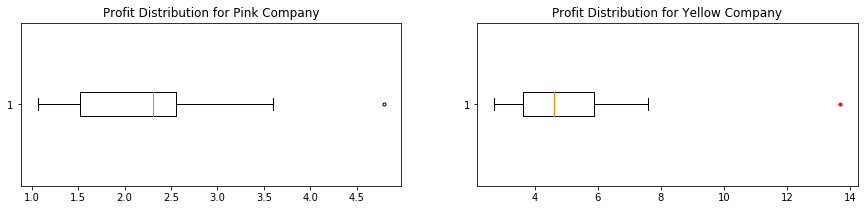

In [210]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (15,3))


ax1.set_title("Profit Distribution for Pink Company")
ax1.boxplot(x1["profit/km"], vert = False, sym = ".")

ax2.set_title("Profit Distribution for Yellow Company")
ax2.boxplot(x2["profit/km"], vert = False, sym = ".r")
plt.show()

From this Box plot we can observe that the Yellow Cab company tends to have higher profit per kilometer than the Pink Cab, as for yellow has a median arround <b> 5 dollars/km </b> and for pink cab they have a median arround <b>2.25 dollars/km</b>, means 2X profit per kilometer, the reason maybe the number of users for each company.

We an observe also that  both have an outlier for the mean profit per kilometer and we can believe that this is comming from NY Stata from the previous graph.

<span id = "find11"></span>

## 4.11 What is the relationship between the km travelled and the profit for each company?

Here also ivistigate if the KM travelled by a user affects the profit comes form this distance.

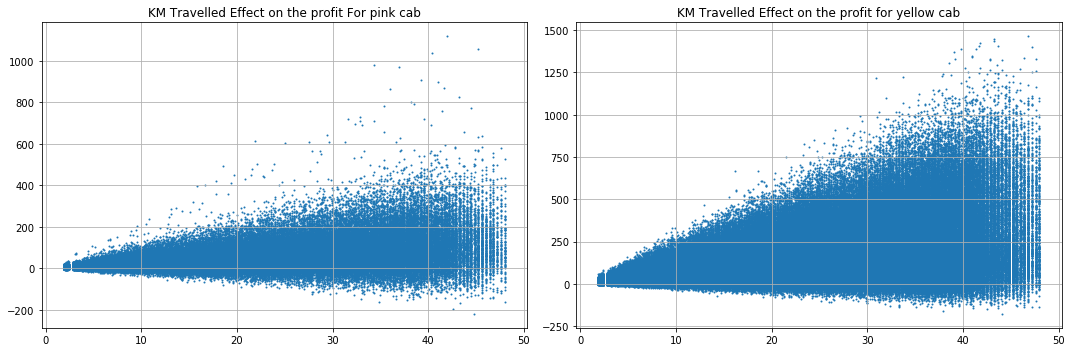

In [194]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (15,5))


ax1.set_title("KM Travelled Effect on the profit For pink cab")
ax1.scatter(pink_data["km_travelled"], pink_data["profit"], s = 1)


ax2.set_title("KM Travelled Effect on the profit for yellow cab")
ax2.scatter(yellow_data["km_travelled"], yellow_data["profit"], s = 1)

plt.tight_layout()
ax1.grid()
ax2.grid()
plt.show()


From this graphs we can see that, Increasing the distance travelled per user doesnot increase the profit with that much, as we can see at sometimes it has negtive loss and this loss maybe more than other losses comes form shrter distance, but definitely is hase more positive side, so the km travelled will not be the main contribution of the profit.

Another thing We can observe herm the variance in prices for kilometers is much higher than in the Yellow Cab company, and this means that for the same travelled distance the Yellow Cab tends to add more profit margin than the Pink Cab.

<span id = "find12"></span>

## 4.12 What are the main places that make profit for each company?

Where does the main contributions of the profit come from?

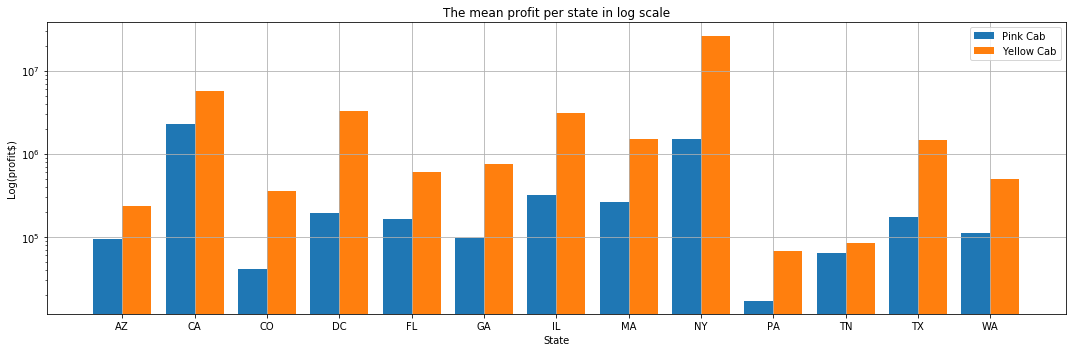

In [190]:
x4 = pink_data.groupby("state")["profit"].sum()
x5 = yellow_data.groupby("state")["profit"].sum()

labels = len(x4)

positions1 = np.arange(labels)
posotopns2 = [x+0.4 for x in positions1]
plt.figure(figsize = (15,5))
plt.title("The mean profit per state in log scale")
plt.bar( positions1,x4, label = "Pink Cab",width = 0.4)
plt.bar( posotopns2,x5, label = "Yellow Cab",width = 0.4)
plt.xticks([r+0.2 for r in range(labels)]
           ,labels = x4.index.to_list())
plt.ylabel("Log(profit$)")
plt.xlabel("State")
plt.legend()
plt.yscale("log")
plt.grid()
plt.tight_layout()
plt.show()

So In a log scale we can see that for Yellow Cab, NY State Contributes the most with a very large distance from the nearest State, it contrbibutes arroun 12 Million dollars, and the next states it arround 1.5 Million dollars wich comes from CA, 1.4 Million dollars come from DC, 1.3 come from IL state.

and for the Pink Cab Company as we expected it has less profit in general, but its most contributers are CA with arround 1.1 Million dollars, 1.05 Million dollars from NY.

This can be a result of that pink company is less wider and maybe a newer one than Yellow Cab

<span id = "find13"></span>

## 4.13 Does increasing the number of users increase the profit?

From Previuos Hypothesis, the profit is mostly dependant on place where the user comes from, so does increasing the number of user in a given state increases the profit gaind from it ?

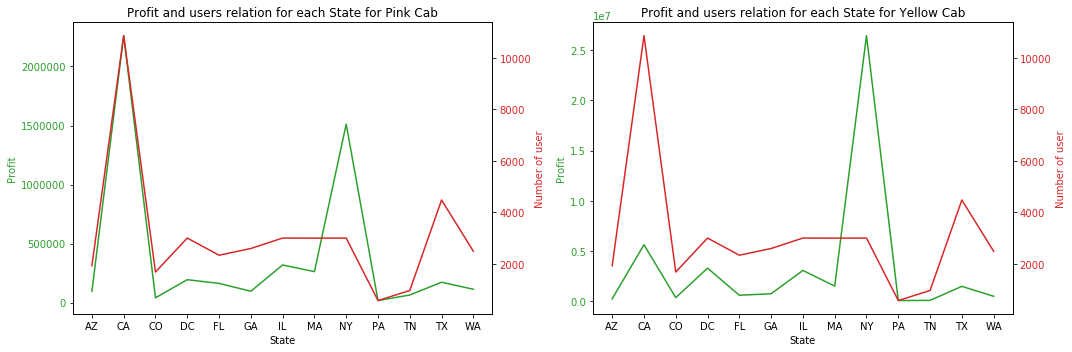

In [151]:
fig, (ax1, ax3) = plt.subplots(1,2,figsize = (15,5))
ax1.set_title("Profit and users relation for each State for Pink Cab")

color = 'tab:green'
ax1.set_xlabel('State')
ax1.set_ylabel('Profit', color=color)
ax1.plot(list(s.groups.keys()), pink_data.groupby("state")["profit"].sum(), color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 
color = 'tab:red'
ax2.set_ylabel('Number of user', color=color)  
ax2.plot(list(s.groups.keys()), users, color=color)
ax2.tick_params(axis='y', labelcolor=color)

s = yellow_data.groupby("state")
users = []
for g in s.groups:
    users.append(len(s.get_group(g)["customer_id"].value_counts()))
    
# fig, ax1 = plt.subplots(figsize = (10,5))
ax3.set_title("Profit and users relation for each State for Yellow Cab")
s1 = yellow_data.groupby("state").groups.keys()

color = 'tab:green'
ax3.set_xlabel('State')
ax3.set_ylabel('Profit', color=color)
ax3.plot(list(s1), yellow_data.groupby("state")["profit"].sum(), color=color)
ax3.tick_params(axis='y', labelcolor=color)

ax4 = ax3.twinx() 
color = 'tab:red'
ax4.set_ylabel('Number of user', color=color)  
ax4.plot(list(s1), users, color=color)
ax4.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

fig.tight_layout()  
plt.show()

We Can see that for Pink Cab, the number if users affect hugely in the profit, as California has the most number of users and contributes the most, but for new NY state this may be not the reason that affects the price, and also the same thing in Yellow Cab.

And the reason can be seen from the hypothesis of Mean price per state whih we can conclude that these companys follows a pricing policy that is dependant on the place, and the NY has mean profit marging arround 15 Dollars for Yellow cab, and arround 6 dollars for Pink cab.

<span id = "find14"></span>
## 4.14 What is the retainability ratio of each company?:

As the Yellow Cab is more profitable and adds more profit margins, so this may come from the trust that it has from its users, so do users repeat the usage of the company's services in this period?

In [126]:
# - Retainabilty ratio (Pie)
pink_train = len(pink_data["customer_id"].value_counts()[pink_data["customer_id"].value_counts() > 1])
pink_len = len(pink_data.drop_duplicates(subset=["customer_id"]))
pink_ret_ratio = (pink_train / pink_len)*100

In [128]:
yellow_train = len(yellow_data["customer_id"].value_counts()[yellow_data["customer_id"].value_counts() > 1])
yellow_len = len(yellow_data.drop_duplicates(subset=["customer_id"]))
yellow_ret_ratio = (yellow_train / yellow_len)*100

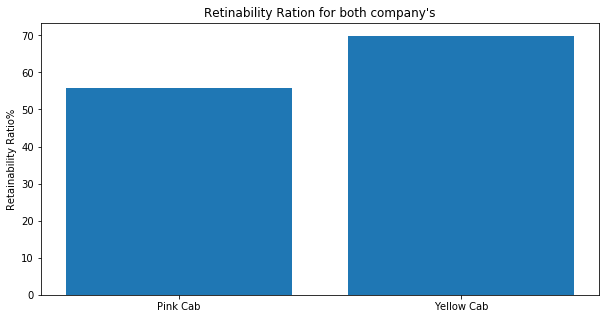

In [129]:
x = ["Pink Cab", "Yellow Cab"]
y = [pink_ret_ratio, yellow_ret_ratio]

plt.figure(figsize = (10,5))
# colors.Colormap()
plt.title("Retinability Ration for both company's")
plt.bar(x, y)
plt.ylabel("Retainability Ratio%")
plt.show()

It Appears that both companys has a good retainability ratio, but as we expected the Yellow cab company has more retainabilty ratio that reaches arround 70% of the users used the company's services more than one time, so this may help them to add more profit overhead.

<span id = "find15"></span>

## 4.15 For how much do the users of each company tend to reuse the service?

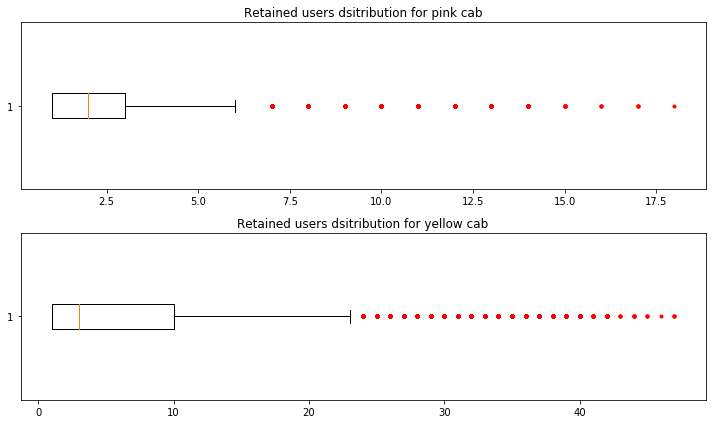

In [165]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize = (10,6))

ax1.set_title("Retained users dsitribution for pink cab")
ax1.boxplot(pink_data["customer_id"].value_counts(), vert = False, sym = ".r")

ax2.set_title("Retained users dsitribution for yellow cab")
ax2.boxplot(yellow_data["customer_id"].value_counts(), vert = False, sym = ".r")

plt.tight_layout()

plt.show()

For Yellow cab it appears that the users are trust them most and reuses them more and more.

<span id = "find16"></span>

## 4.16 What are main categories of the users according to retainabilty ratio?

So how can we divide the users according to their loyality for each company?

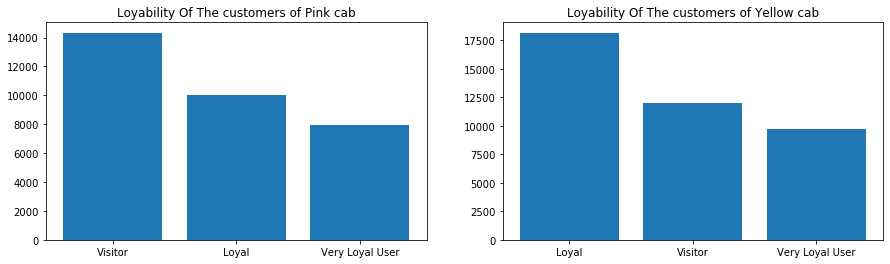

In [166]:
unique_users_pink = pink_data.drop_duplicates(subset = ["customer_id"])
unique_users_yellow = yellow_data.drop_duplicates(subset = ["customer_id"])

fig, (ax1, ax2) = plt.subplots(1,2,figsize= (15,4))

ax1.bar(unique_users_pink["customer_loyability"].value_counts().index, 
        unique_users_pink["customer_loyability"].value_counts())
ax1.set_title("Loyability Of The customers of Pink cab")


ax2.bar(unique_users_yellow["customer_loyability"].value_counts().index, 
        unique_users_yellow["customer_loyability"].value_counts())
ax2.set_title("Loyability Of The customers of Yellow cab")

plt.show()

As we can expect, Most of the Yellow cab users are loyal to the company and reapeted the usage more, but also the pink cab company as a newer company has a good portion of it's user that used the service.

<span id = "conc"></span>

# 5. Conclusions

As a result of our aalysis, we can conclude that:
- <b>The industry case:</b> This industry has a wide base of users that relys on this services, and it's a very promise industry to invest on.
- The most important users slice is the the yonger people, and to invest on this industry we have to see how each company reaches this slice and the marketing ways that they follow. 
- This industry has a trust from both gender, so the companys must address them appropriately.
- The more trusted Company, the more profit margin that it can add to its service which means more money profit for the investors.
- Place is important for profit, and the companys are considering this in their pricing policy.
- There are a lot of promising places and states that the companys hae to cocentrate on them to gain more popularity of them.